In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd

import gcsfs
import zarr


In [22]:
temperature_pi_ESM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_esm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)

temperature_pi_CM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_cm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)

temp_CM4 = temperature_pi_CM4.temp
temp_ESM4 = temperature_pi_ESM4.temp

In [3]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
523769,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523770,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523771,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523772,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [4]:
df_orog_cm4 = df.query("source_id=='GFDL-CM4' & experiment_id == 'piControl' & variable_id == 'orog' & grid_label=='gr1'")
df_orog_cm4

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
1057,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,fx,orog,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/piCon...,NaN,20180701


In [5]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_orog_cm4.zstore.values[-1]
mapper = gcs.get_mapper(zstore)

orog_cm4 = xr.open_zarr(mapper, consolidated=True)
orog_cm4

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 180, lon: 288)
Coordinates:
  * bnds      (bnds) float64 1.0 2.0
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds  (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon       (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds  (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
Data variables:
    orog      (lat, lon) float32 dask.array<chunksize=(180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  54750.0
    comment:                <null ref>
    ...                     ...
    tracking_id:            hdl:21.14100/b1cb5f94-7f79-4685-abfb-41e76cbc68ac
    variable_id:            orog
    variant_info:           N/A
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/b1cb5f94-7f79-4685-abfb-41e76cbc68ac
    version_id:             v20180701

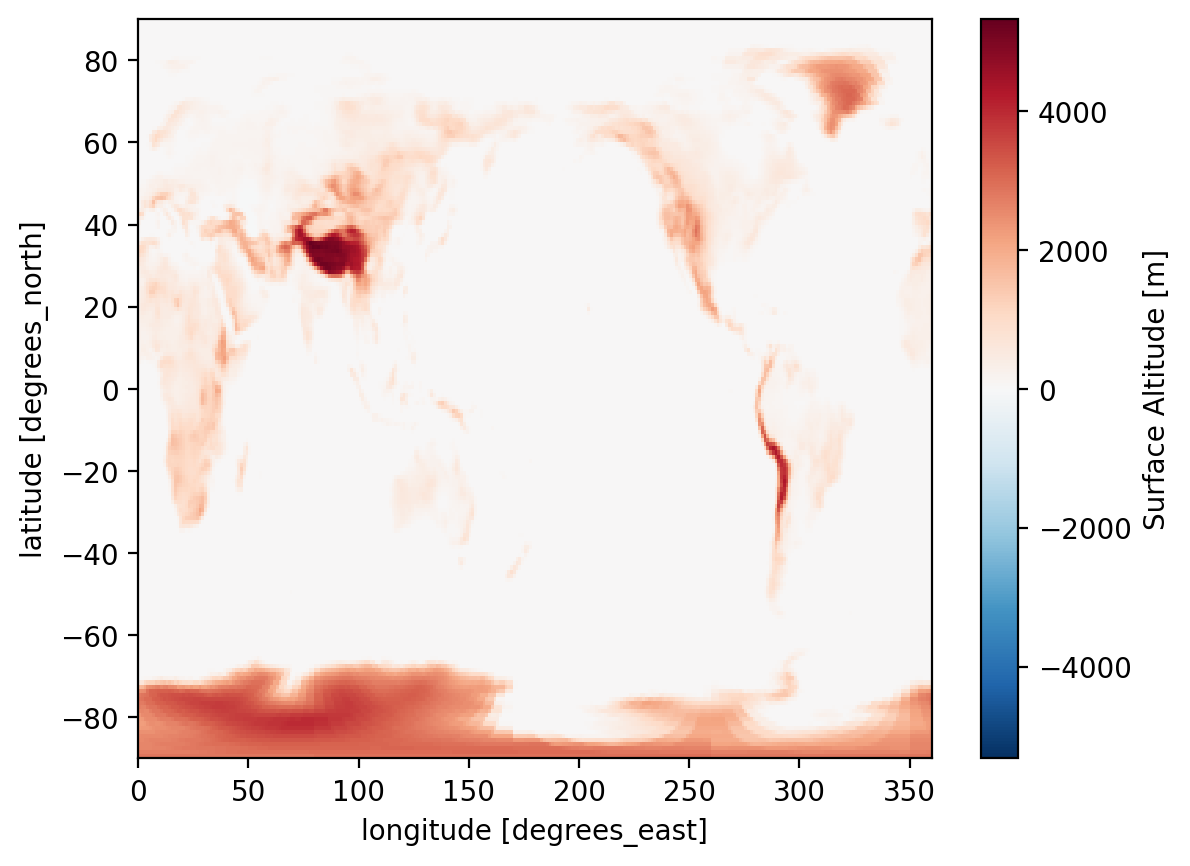

In [6]:
CM4_orog = orog_cm4.orog
CM4_orog.plot()

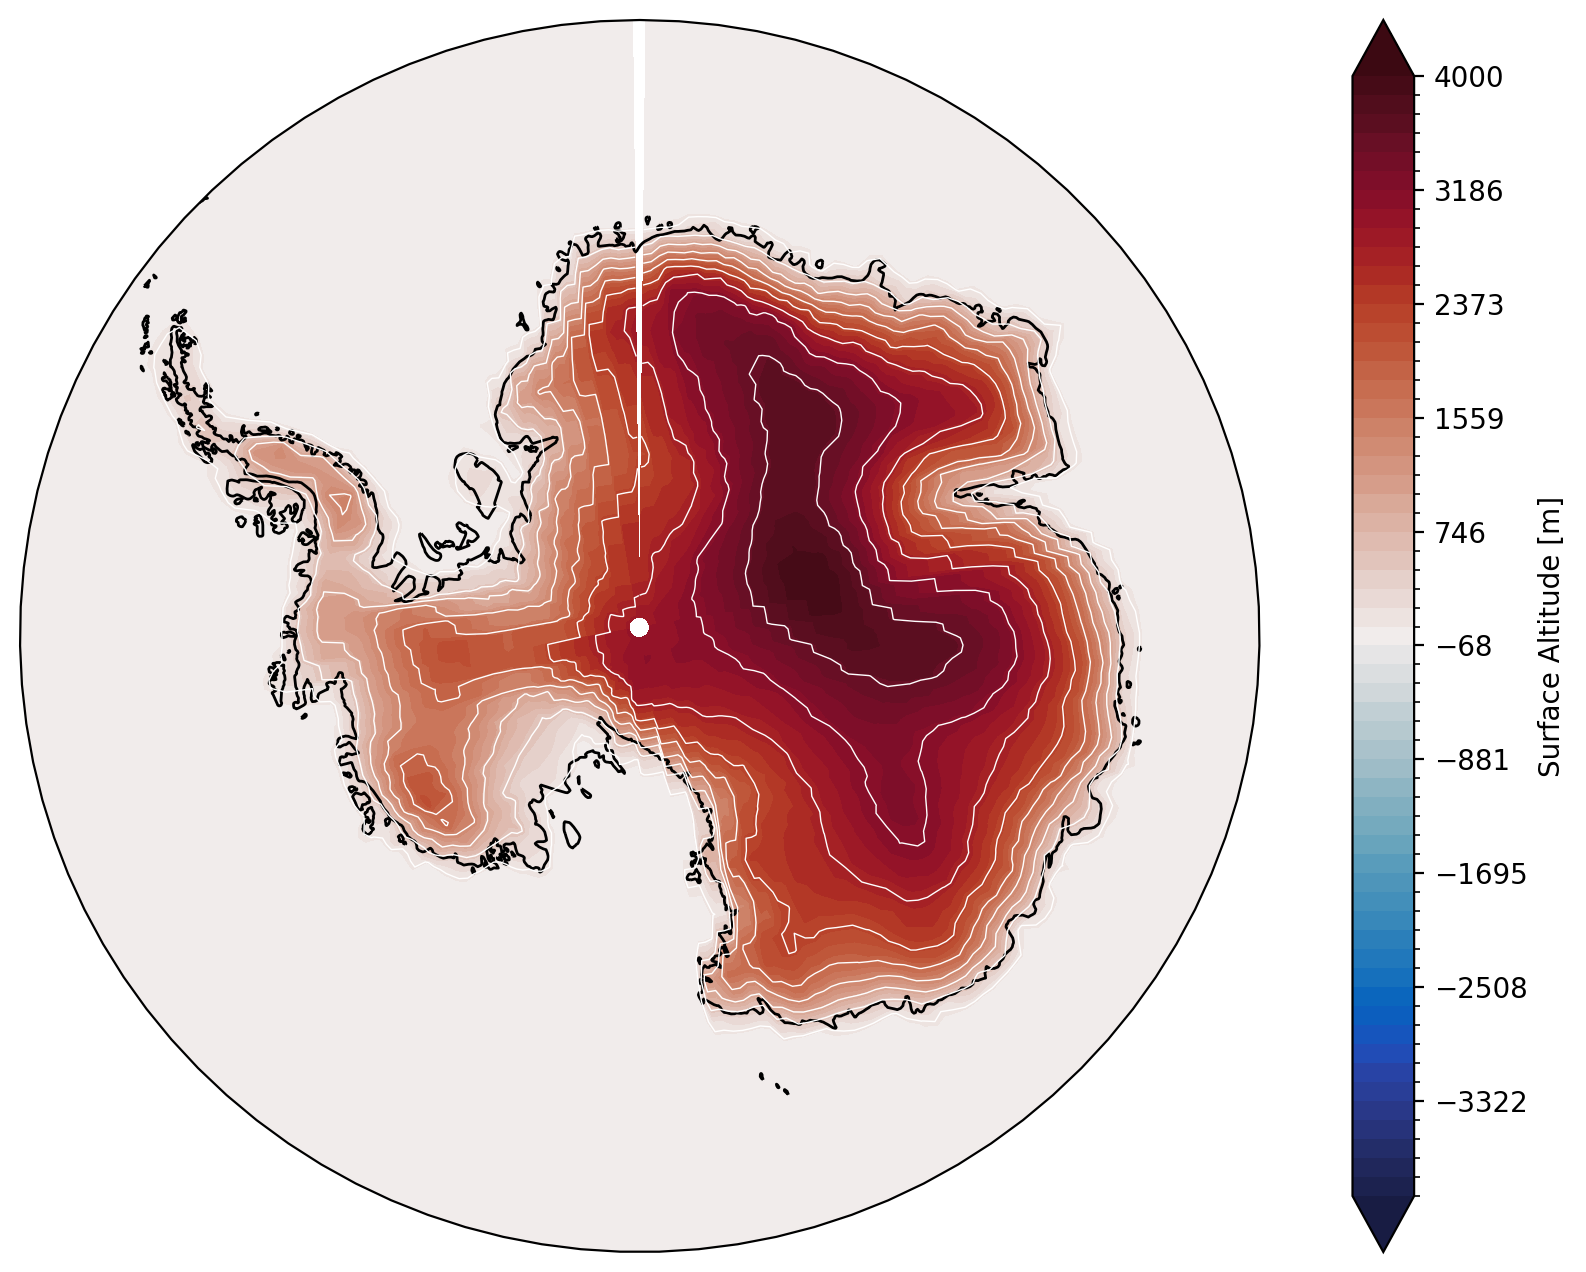

In [7]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
CM4_orog.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=-4000,
               vmax=4000,
               extend='both',
               cmap=cmocean.cm.balance, levels=60)
CM4_orog.plot.contour(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=100,
               vmax=4000,
               extend='both',
               colors='white', levels=10, linewidths=0.5)


    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

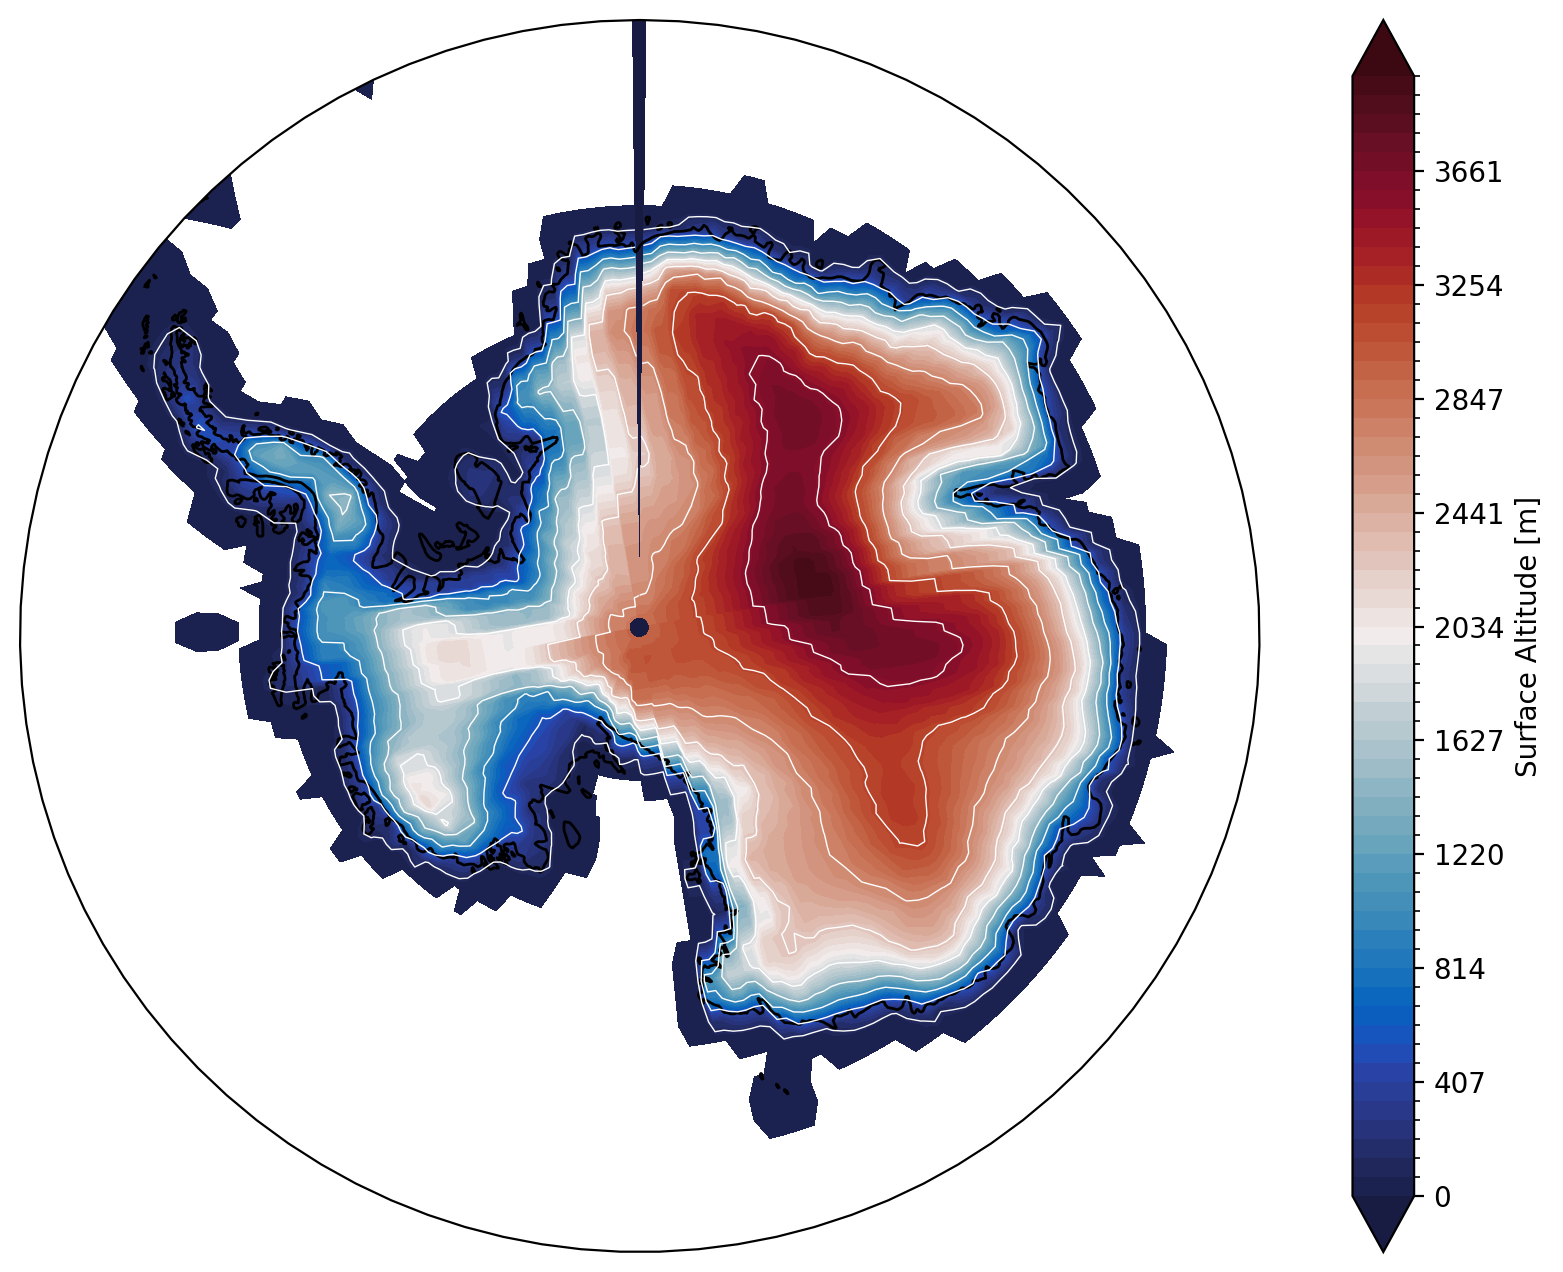

In [8]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
CM4_orog.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
               cmap=cmocean.cm.balance, levels=60)
CM4_orog.plot.contour(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=100,
               vmax=4000,
               extend='both',
               colors='white', levels=10, linewidths=0.5)


    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

In [9]:
df_orog_esm4 = df.query("source_id=='GFDL-ESM4' & experiment_id == 'piControl' & variable_id == 'orog' & grid_label=='gr1'")
df_orog_esm4

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
14877,CMIP,NOAA-GFDL,GFDL-ESM4,piControl,r1i1p1f1,fx,orog,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piCo...,NaN,20180701


In [10]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_orog_esm4.zstore.values[-1]
mapper = gcs.get_mapper(zstore)

orog_esm4 = xr.open_zarr(mapper, consolidated=True)
orog_esm4

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 180, lon: 288)
Coordinates:
  * bnds      (bnds) float64 1.0 2.0
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds  (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon       (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds  (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
Data variables:
    orog      (lat, lon) float32 dask.array<chunksize=(180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          Coupled climate state after 400 years of spinup, ...
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                <null ref>
    ...                     ...
    tracking_id:            hdl:21.14100/e0d39952-a008-419b-8454-d44d8e138fec
    variable_id:            orog
    variant_info:           N/A
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/e0d39952-a008-419b-8454-d44d8e138fec
    version_id:             v20180701

In [11]:
ESM4_orog = orog_esm4.orog

In [12]:
ESM4_orog

<xarray.DataArray 'orog' (lat: 180, lon: 288)>
dask.array<open_dataset-orog, shape=(180, 288), dtype=float32, chunksize=(180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: mean
    interp_method:  conserve_order1
    long_name:      Surface Altitude
    original_name:  orog
    standard_name:  surface_altitude
    units:          m

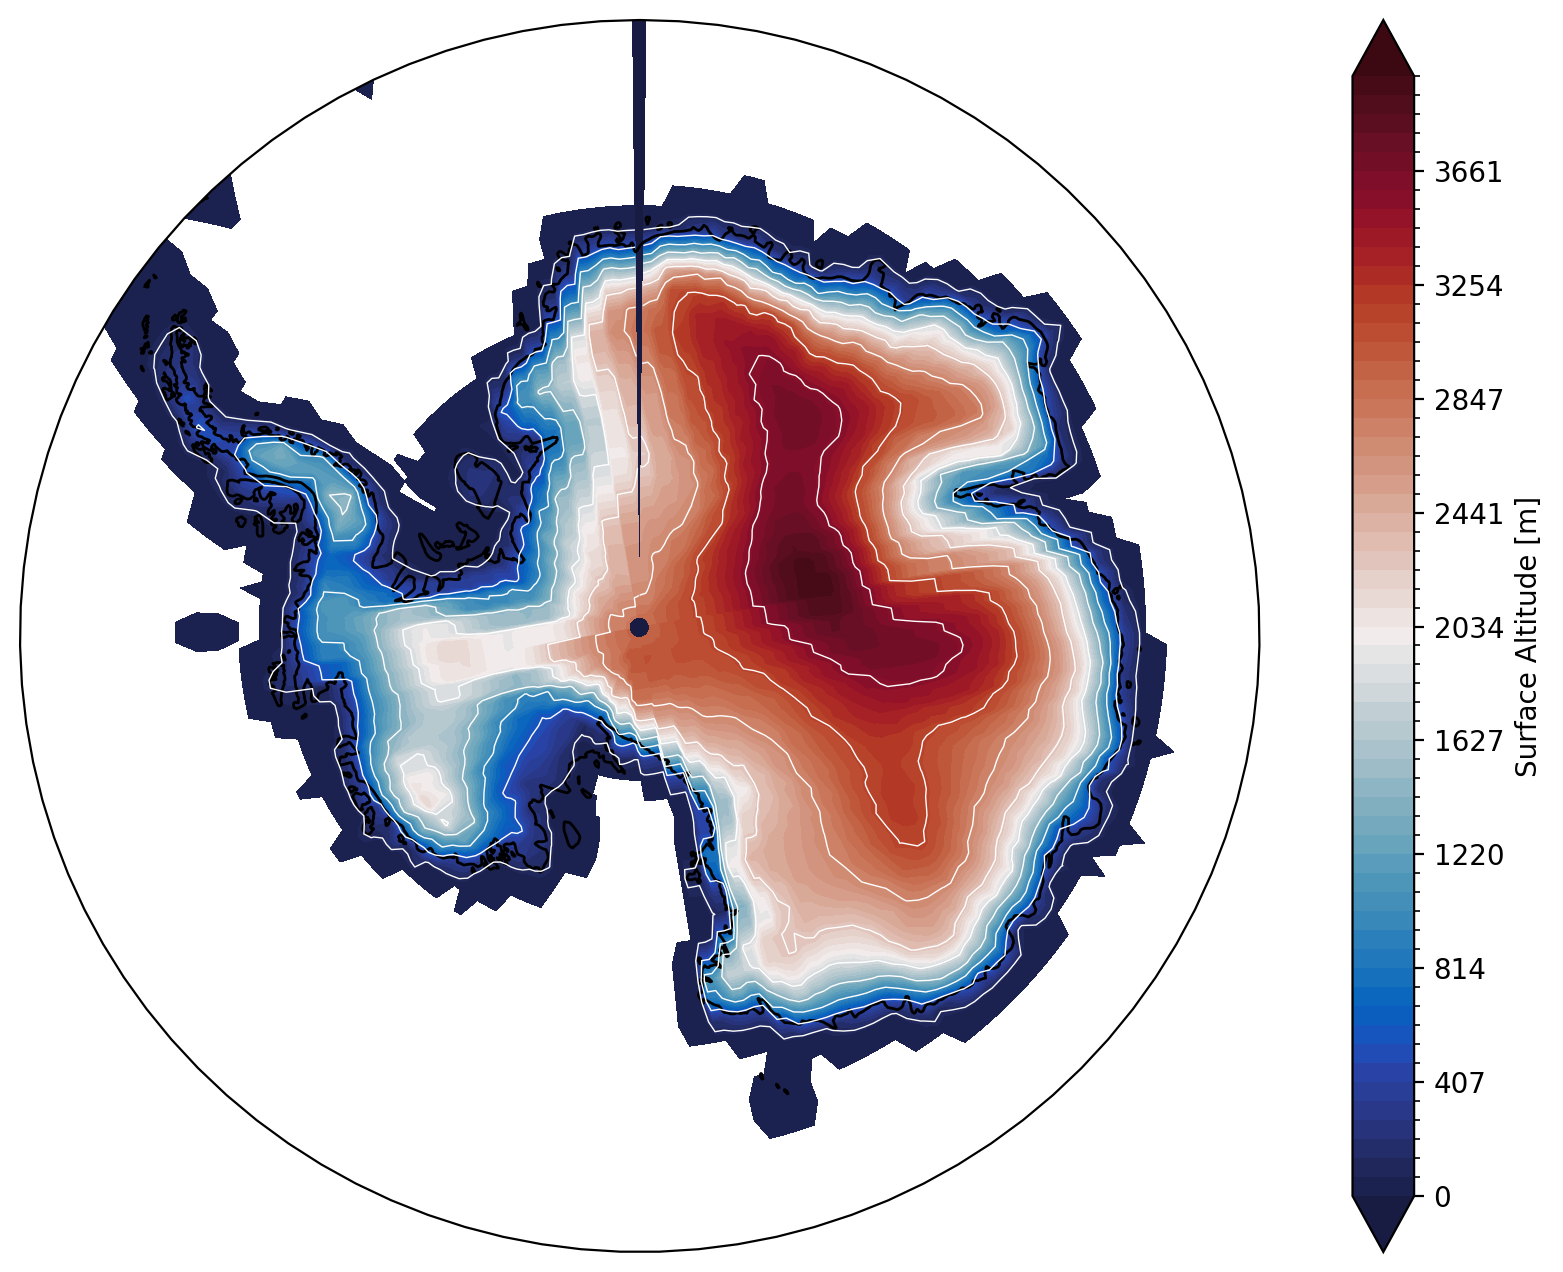

In [13]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
ESM4_orog.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
               cmap=cmocean.cm.balance, levels=60)
ESM4_orog.plot.contour(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=100,
               vmax=4000,
               extend='both',
               colors='white', levels=10, linewidths=0.5)


    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

In [14]:
ross_CM4 = CM4_orog.sel(lat=slice(-99,-75)).sel(lon=slice(150,240)).where(CM4_orog<=300)
ross_ESM4 = ESM4_orog.sel(lat=slice(-99,-75)).sel(lon=slice(150,240)).where(ESM4_orog<=300)

filchner_CM4 = CM4_orog.sel(lat=slice(-99,-76)).sel(lon=slice(270,340)).where(CM4_orog<=300)
filchner_ESM4 = ESM4_orog.sel(lat=slice(-99,-76)).sel(lon=slice(270,340)).where(ESM4_orog<=300)

peninsula_CM4 = CM4_orog.sel(lat=slice(-74,-59)).sel(lon=slice(270,320))
peninsula_ESM4 = ESM4_orog.sel(lat=slice(-74,-59)).sel(lon=slice(270,320))

loweast_CM4 = CM4_orog.sel(lat=slice(-99,-59)).sel(lon=slice(0,180)).where(CM4_orog<=2250)
loweast_ESM4 = ESM4_orog.sel(lat=slice(-99,-59)).sel(lon=slice(0,180)).where(ESM4_orog<=2250)

lowwest_CM4 = CM4_orog.sel(lat=slice(-99,-59)).sel(lon=slice(180,360)).where(CM4_orog<=2250)
lowwest_ESM4 = ESM4_orog.sel(lat=slice(-99,-59)).sel(lon=slice(180,360)).where(ESM4_orog<=2250)

plateau_CM4 = CM4_orog.sel(lat=slice(-99,-59)).sel(lon=slice(0,360)).where(CM4_orog>=2250)
plateau_ESM4 = ESM4_orog.sel(lat=slice(-99,-59)).sel(lon=slice(0,360)).where(ESM4_orog>=2250)

In [15]:
ross_CM4_mask = (ross_CM4 / ross_CM4)
ross_ESM4_mask = (ross_ESM4 / ross_ESM4)

filchner_CM4_mask = (filchner_CM4 / filchner_CM4)
filchner_ESM4_mask = (filchner_ESM4 / filchner_ESM4)

peninsula_CM4_mask = (peninsula_CM4 / peninsula_CM4)
peninsula_ESM4_mask = (peninsula_ESM4 / peninsula_ESM4)

loweast_CM4_mask = (loweast_CM4 / loweast_CM4)
loweast_ESM4_mask = (loweast_ESM4 / loweast_ESM4)

lowwest_CM4_mask = (lowwest_CM4 / lowwest_CM4)
lowwest_ESM4_mask = (lowwest_ESM4 / lowwest_ESM4)

plateau_CM4_mask = (plateau_CM4 / plateau_CM4)
plateau_ESM4_mask = (plateau_ESM4 / plateau_ESM4)

In [16]:
plateau_ESM4_mask.values

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [17]:
CM4_mask_antarctica= xr.Dataset()
ESM4_mask_antarctica=xr.Dataset()

In [18]:
#CM4 mask data arrays
CM4_mask_antarctica['Ross_CM4']=ross_CM4_mask
CM4_mask_antarctica['filchner_CM4']=filchner_CM4_mask
CM4_mask_antarctica['peninsula_CM4']=peninsula_CM4_mask
CM4_mask_antarctica['loweast_CM4']=loweast_CM4_mask
CM4_mask_antarctica['lowwest_CM4']=lowwest_CM4_mask
CM4_mask_antarctica['plateau_CM4']=plateau_CM4_mask

In [19]:
#ESM4 mask data arrays
ESM4_mask_antarctica['Ross_ESM4']=ross_ESM4_mask
ESM4_mask_antarctica['filchner_ESM4']=filchner_ESM4_mask
ESM4_mask_antarctica['peninsula_ESM4']=peninsula_ESM4_mask
ESM4_mask_antarctica['loweast_ESM4']=loweast_ESM4_mask
ESM4_mask_antarctica['lowwest_ESM4']=lowwest_ESM4_mask
ESM4_mask_antarctica['plateau_ESM4']=plateau_ESM4_mask

/home/tu.temple.edu/tuo59681/miniconda3/envs/occ_basic/lib/python3.9/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


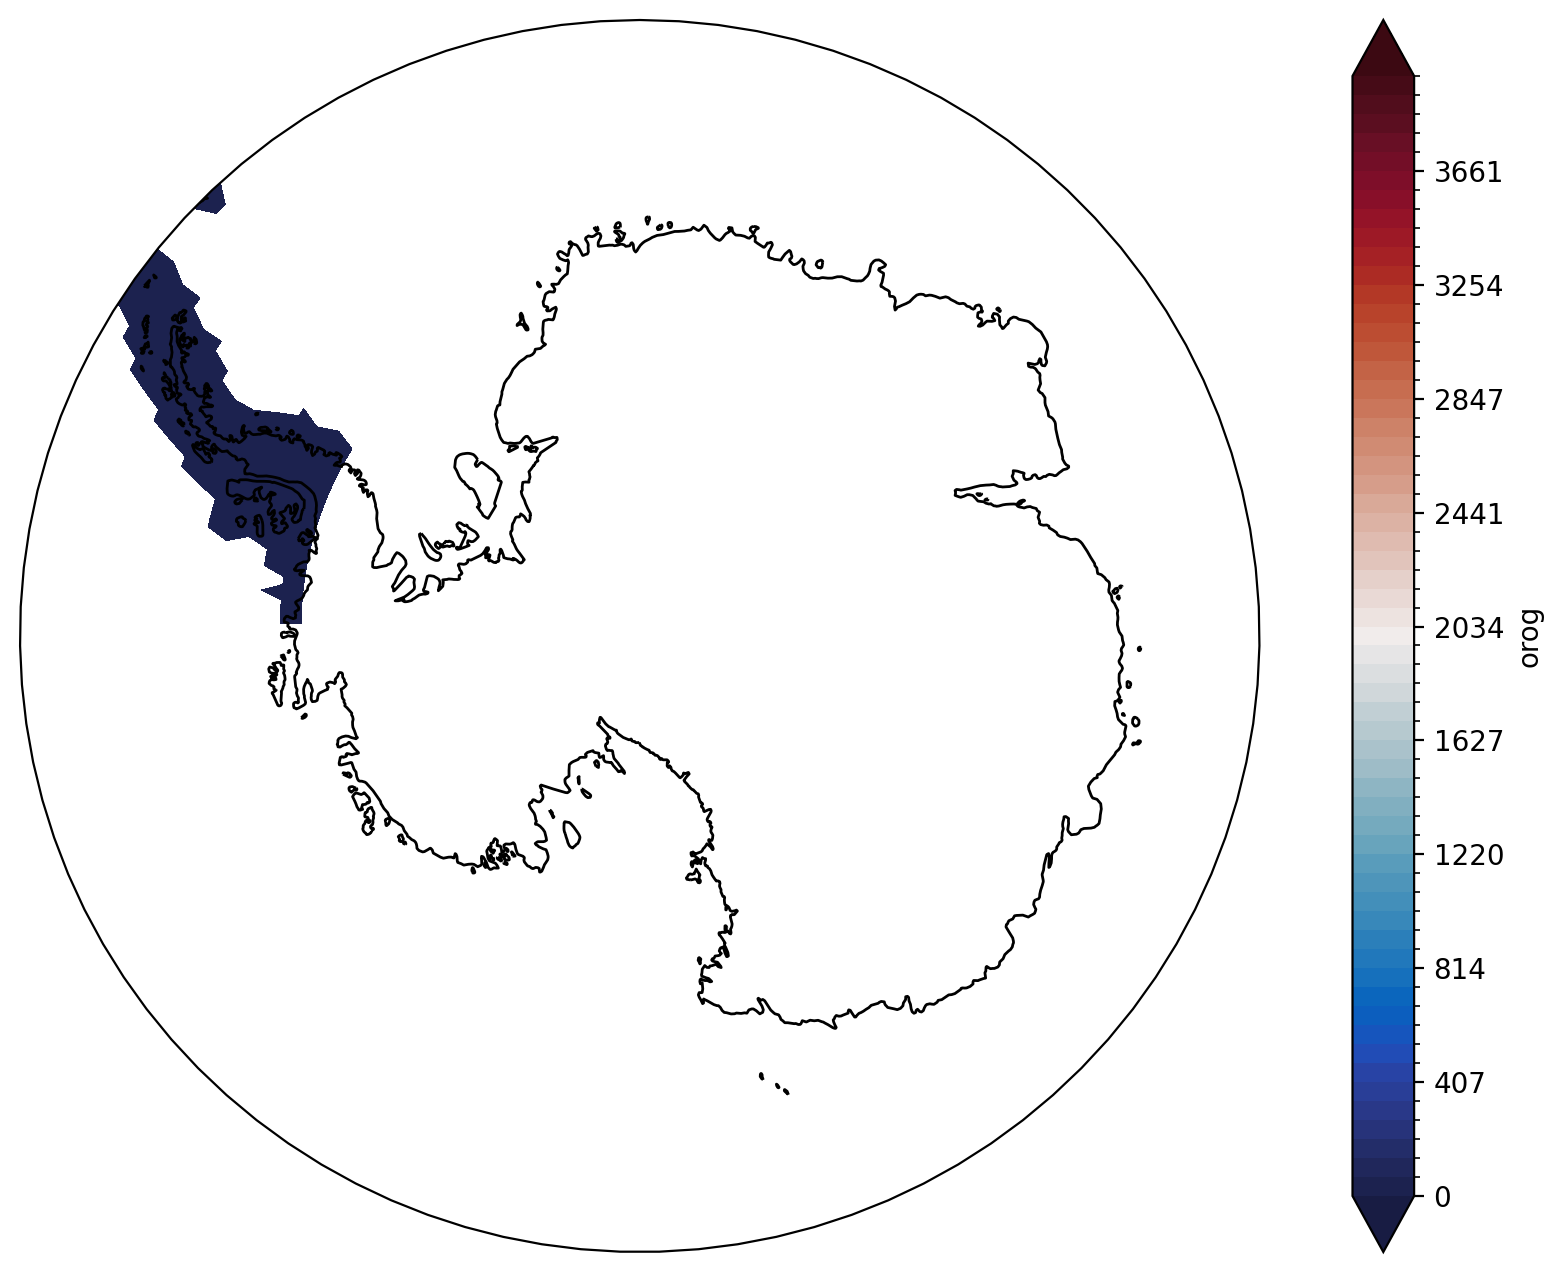

In [20]:
#woo it works
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
peninsula_ESM4_mask.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
               cmap=cmocean.cm.balance, levels=60)


    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

In [21]:
CM4_mask_antarctica.to_netcdf('CM4_mask_antarctica.nc')
ESM4_mask_antarctica.to_netcdf('ESM4_mask_antarctica.nc')

/home/tu.temple.edu/tuo59681/miniconda3/envs/occ_basic/lib/python3.9/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [23]:
temp_CM4


<xarray.DataArray 'temp' (time: 1140, pfull: 33, lat: 180, lon: 288)>
dask.array<concatenate, shape=(1140, 33, 180, 288), dtype=float32, chunksize=(1, 33, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * pfull    (pfull) float64 2.164 5.845 10.75 17.11 ... 975.6 985.4 992.8 997.9
  * time     (time) object 0251-01-16 12:00:00 ... 0350-12-16 12:00:00
Attributes:
    long_name:      temperature
    units:          K
    valid_range:    [100. 350.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order2

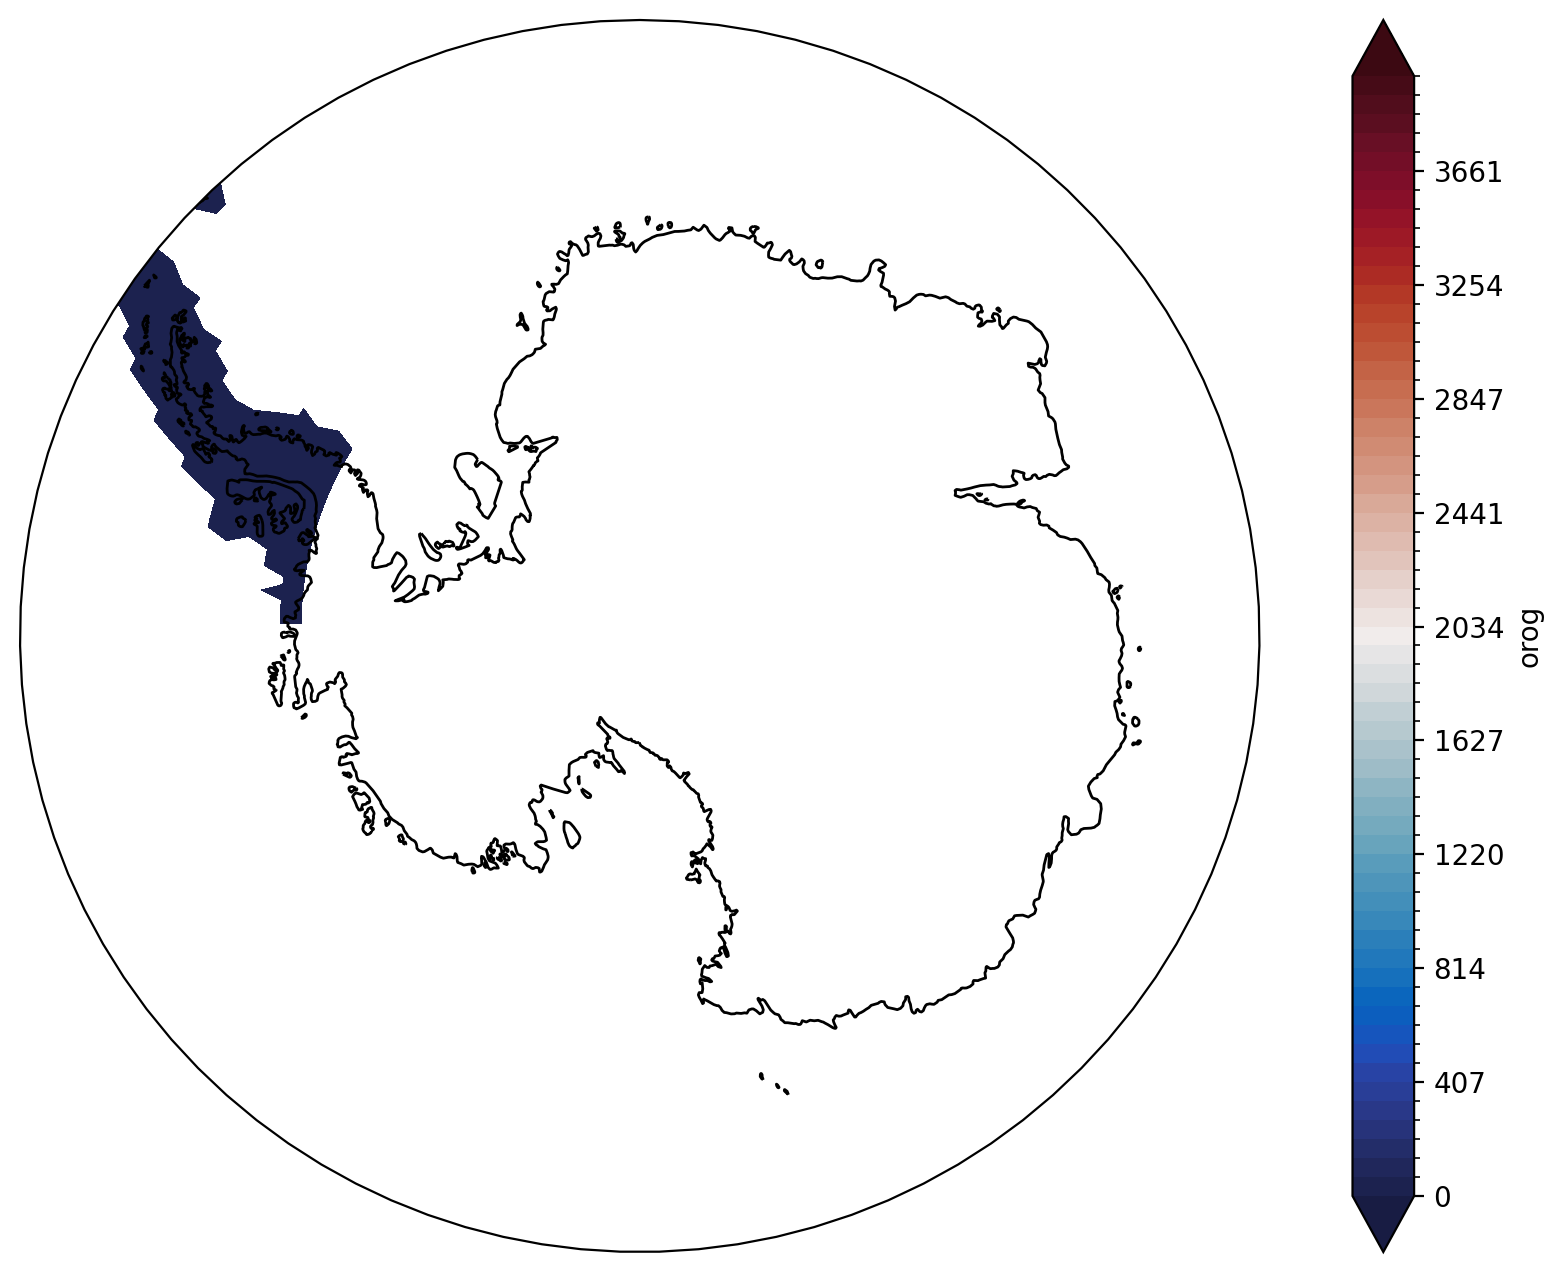

In [46]:

subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
peninsula_ESM4_mask.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
               cmap=cmocean.cm.balance, levels=60)


    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

In [52]:
ross_sea_temp=(temp_CM4*(CM4_mask_antarctica.Ross_CM4))


In [60]:
test=ross_sea_temp.mean(dim='time').mean(dim='pfull')

/home/tu.temple.edu/tuo59681/miniconda3/envs/occ_basic/lib/python3.9/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


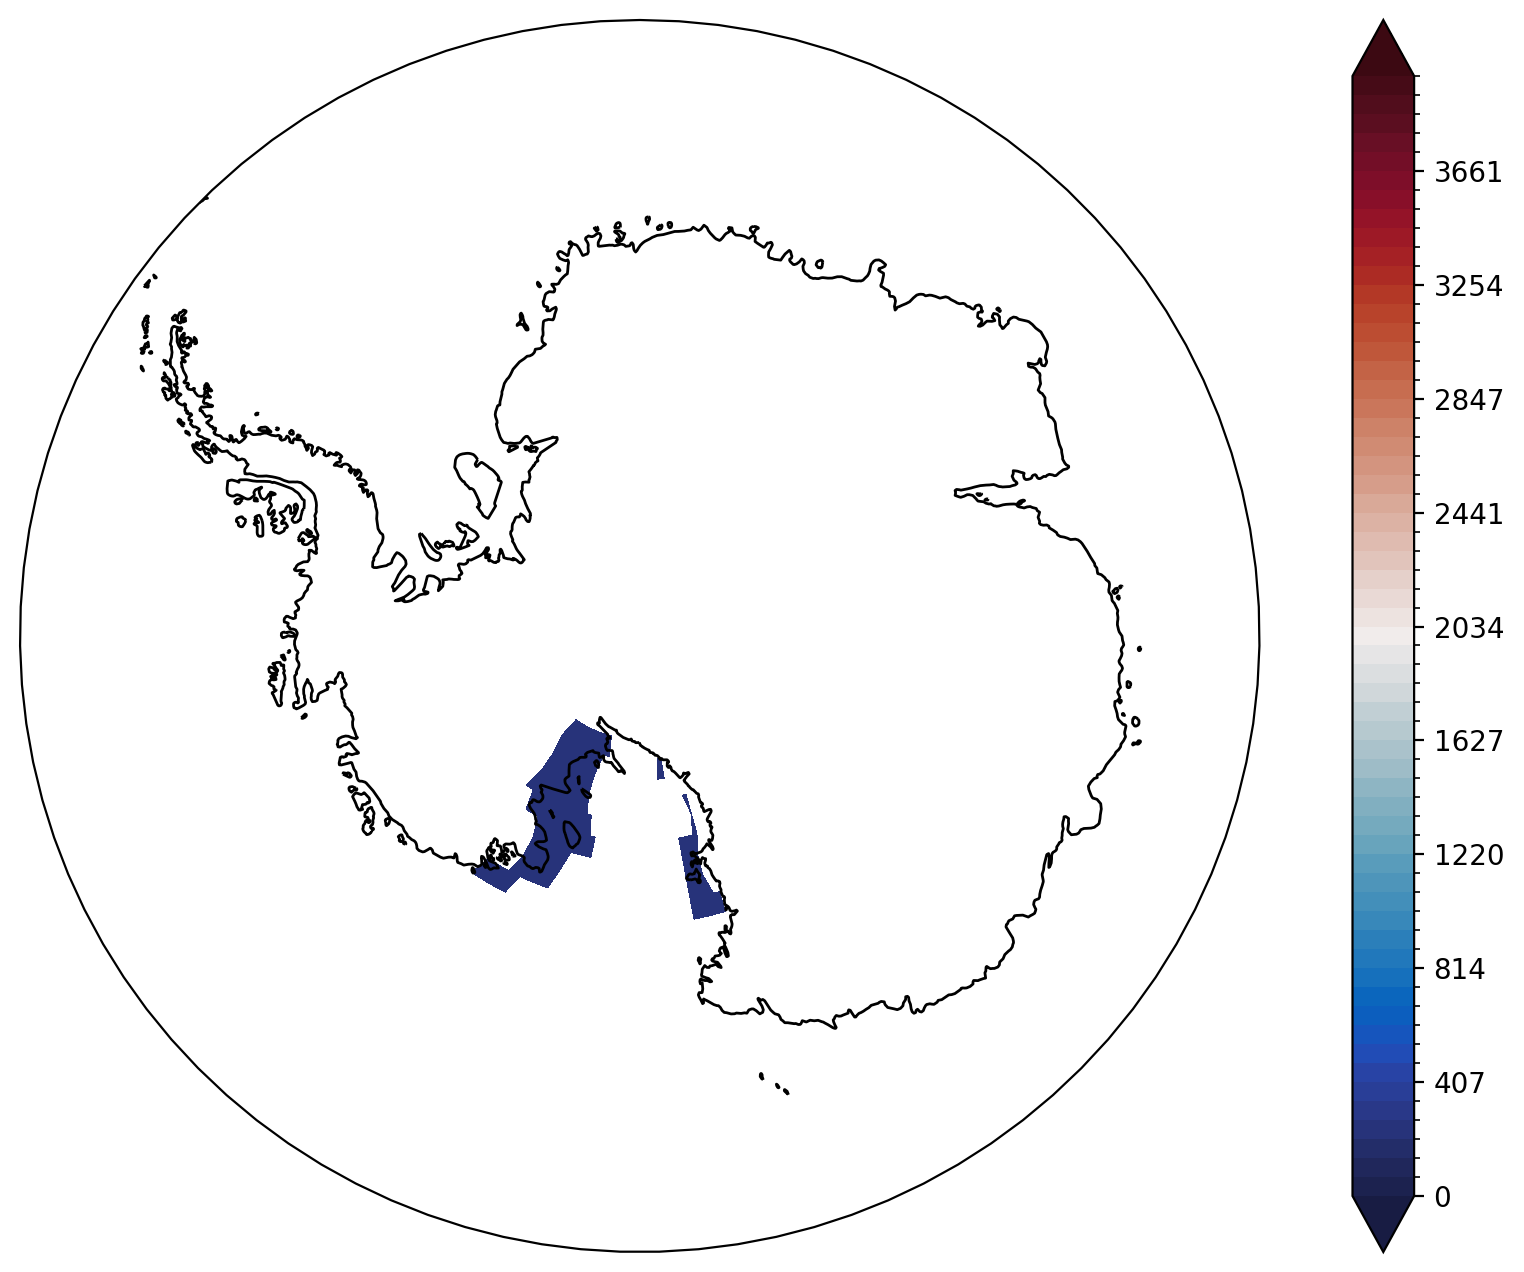

In [61]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
test.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
               cmap=cmocean.cm.balance, levels=60)


    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

In [67]:
time1=temp_CM4.isel(time=0).mean(dim='pfull')
time2=temp_CM4.isel(time=1000).mean(dim='pfull')
temp_anom= time2-time1
ross_sea_temp_anom=(temp_anom*(CM4_mask_antarctica.Ross_CM4))

/home/tu.temple.edu/tuo59681/miniconda3/envs/occ_basic/lib/python3.9/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


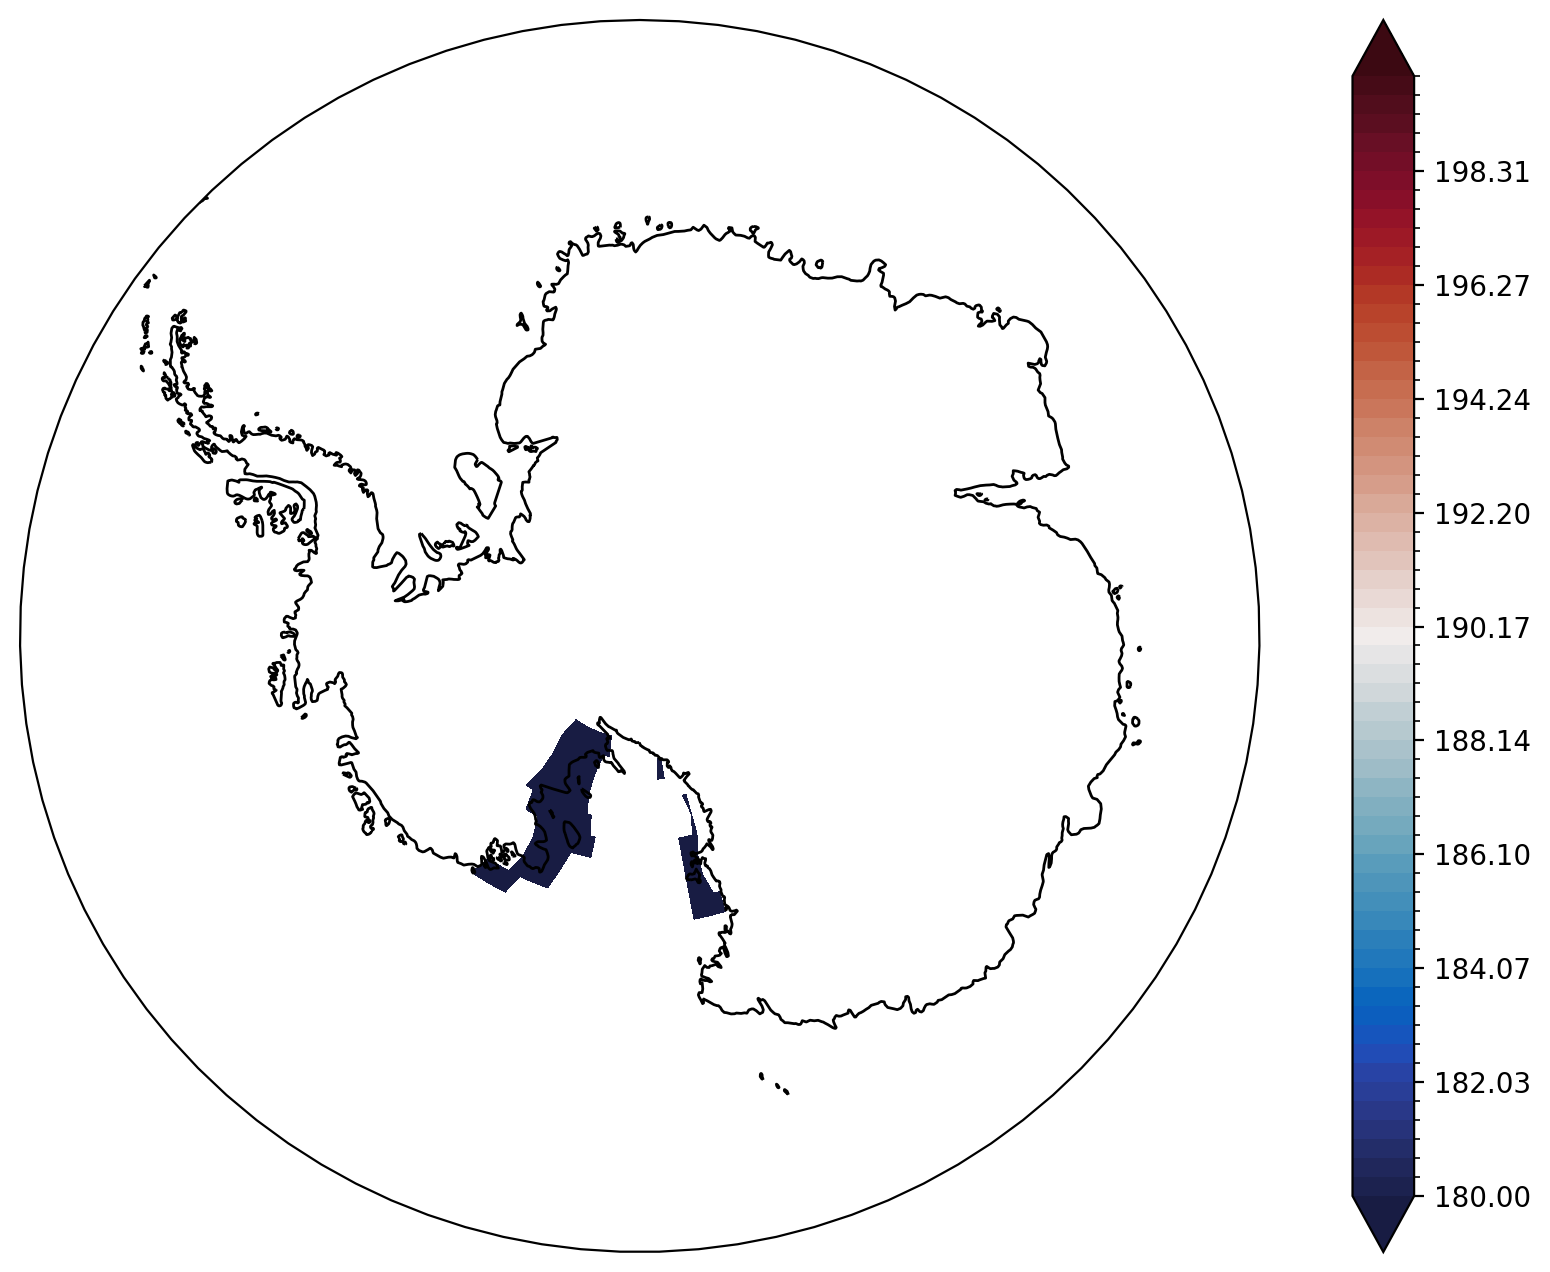

In [71]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
ross_sea_temp_anom.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=180,
               vmax=200,
               extend='both',
               cmap=cmocean.cm.balance, levels=60)


    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()